Quartiles : 3 points which divide the total data into four equal parts when it has been orderly arranged are known as Quartiles.

Interquartile Range [IQR]
The data range that contains the middle 50% of the entries.

IQR = Q3 - Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dt = pd.read_csv("scholarship.csv")

In [3]:
dt.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\Gill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scholarship_exam_marks', ylabel='Density'>

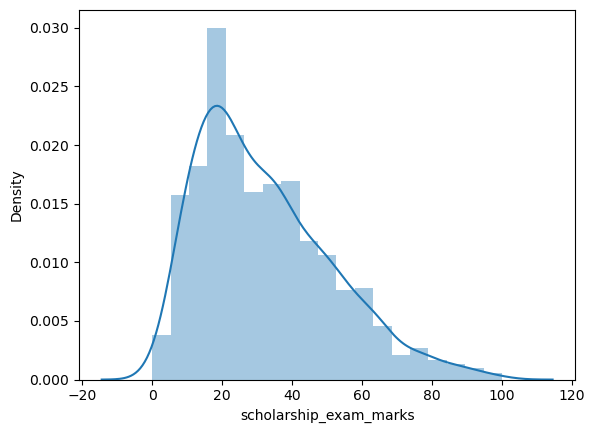

In [6]:
sns.distplot(dt["scholarship_exam_marks"])

<AxesSubplot:ylabel='scholarship_exam_marks'>

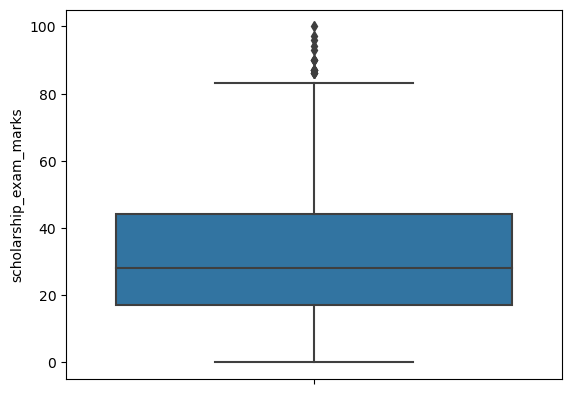

In [9]:
sns.boxplot(y=dt["scholarship_exam_marks"])

In [10]:
Q1 = dt["scholarship_exam_marks"].quantile(0.25)
Q3 = dt["scholarship_exam_marks"].quantile(0.75)

In [11]:
Q1, Q3


(17.0, 44.0)

In [12]:
dt.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [13]:
IQR = Q3 - Q1

In [14]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5*IQR

In [15]:
min , max

(-23.5, 84.5)

In [18]:
dt[(dt["scholarship_exam_marks"]<min) | (dt["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


Now we have to remove outliers so we will do, Trimming

In [21]:
dt_new = dt[(dt["scholarship_exam_marks"]>min) & (dt["scholarship_exam_marks"]<max)]

C:\Users\Gill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


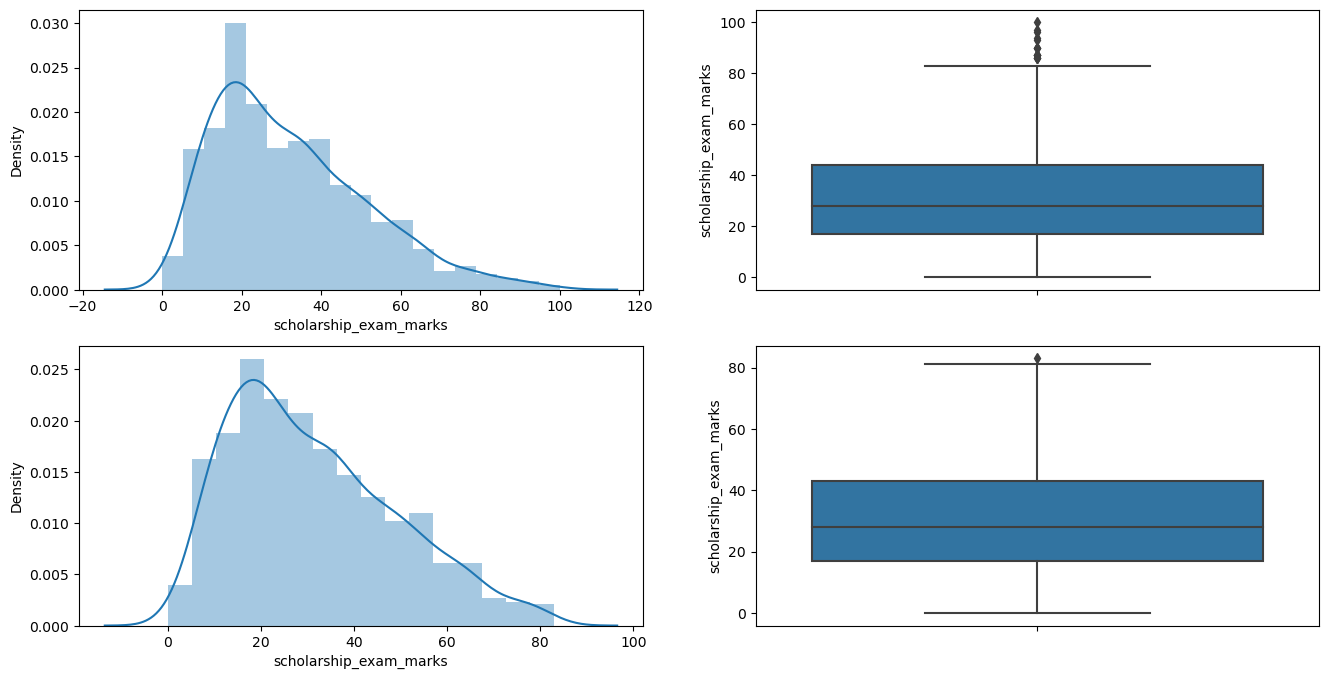

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dt["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(y=dt["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(dt_new["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(y=dt_new["scholarship_exam_marks"])

plt.show()

In [34]:
dt.shape

(1000, 3)

Capping

In [35]:

dt["scholarship_exam_marks"] = np.where(dt["scholarship_exam_marks"]>max,
         max, 
         np.where(dt["scholarship_exam_marks"]<min,min, dt["scholarship_exam_marks"]))

In [36]:
dt.shape

(1000, 3)

<AxesSubplot:ylabel='scholarship_exam_marks'>

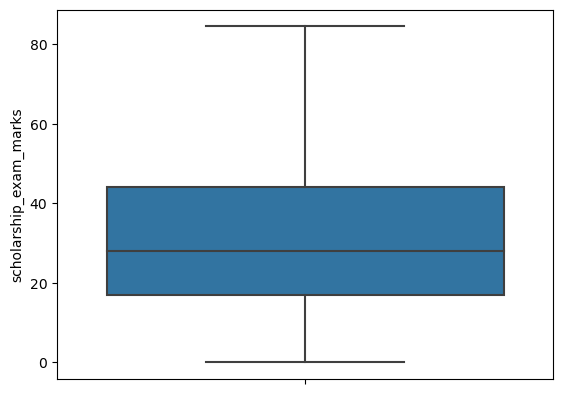

In [37]:
sns.boxplot(y=dt["scholarship_exam_marks"])